# Predicting Employee Attrition Rate


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [7]:
#import dataset
df = pd.read_excel('dataset2.xlsx')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# the number of rows and number of columns in the data
df.shape

(1470, 35)

In [5]:
# the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# check for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### there are no null values over the entire data

In [11]:
# some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\mohat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

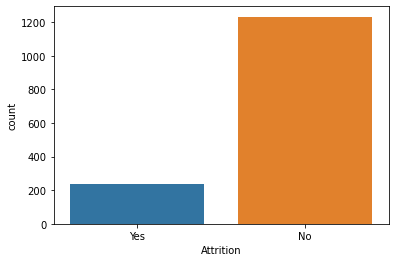

In [13]:
# Visualize this count 
sns.countplot(df['Attrition'])

In [14]:
gender_dict = df["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Count of different gender'}>

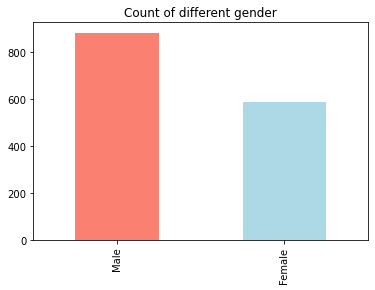

In [15]:
df['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

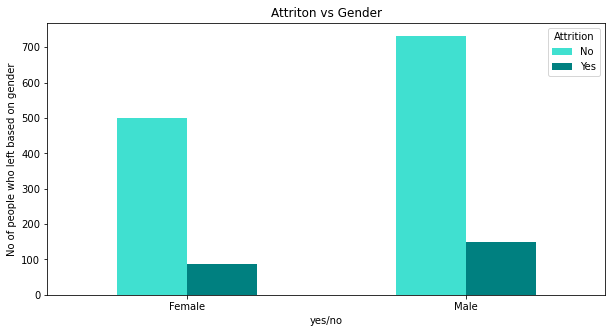

In [16]:
#Create a plot for crosstab
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",color=['turquoise','teal'],figsize=(10,5))
plt.title("Attriton vs Gender")
plt.xlabel("yes/no")
plt.ylabel("No of people who left based on gender")
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Research & Development'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources')])

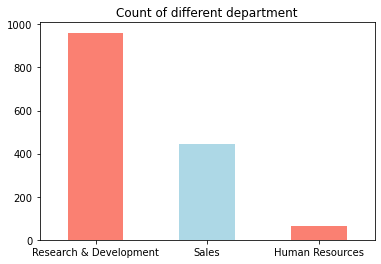

In [17]:
df['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different department")
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

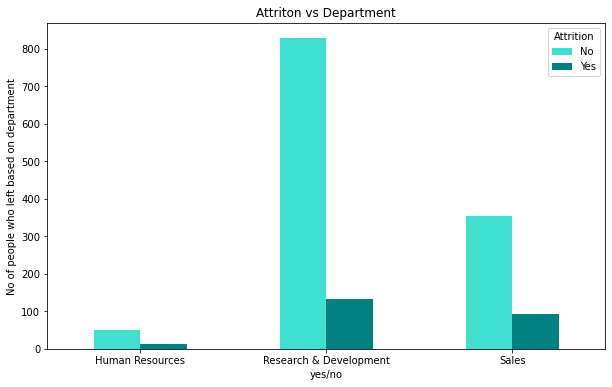

In [18]:
pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar",color=['turquoise','teal'],figsize=(10,6))
plt.title("Attriton vs Department")
plt.xlabel("yes/no")
plt.ylabel("No of people who left based on department")
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Count of different Job roles'}>

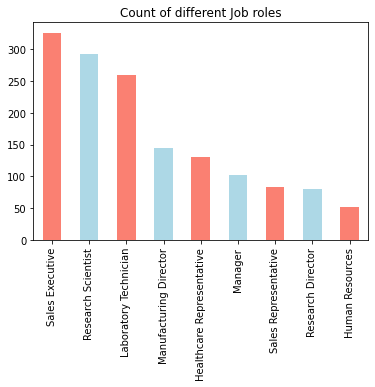

In [19]:
df['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different Job roles")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

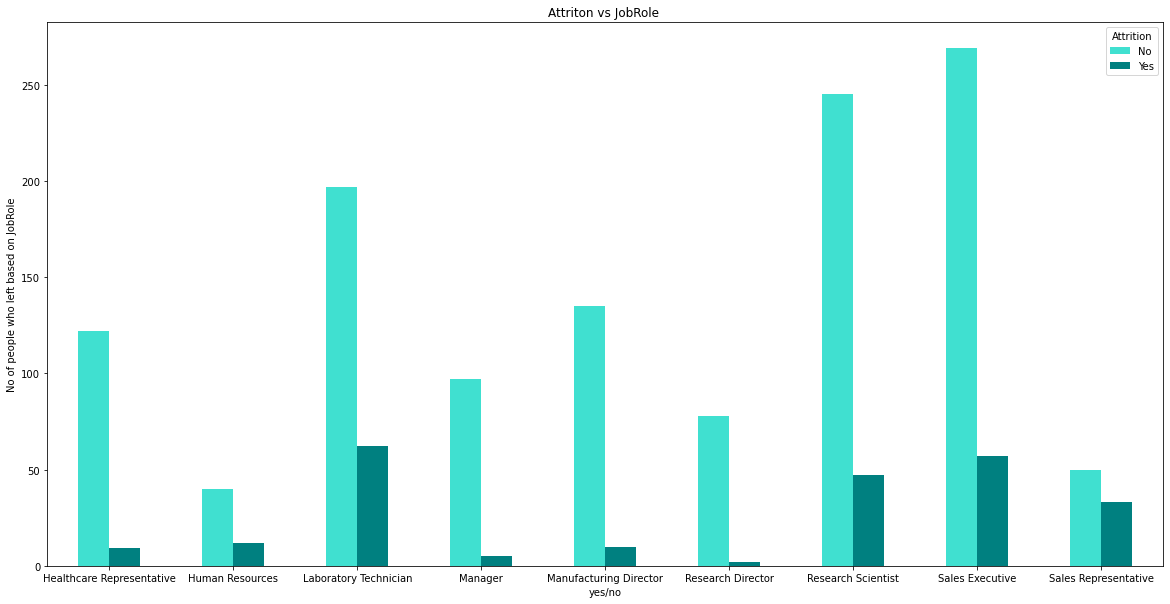

In [20]:
pd.crosstab(df['JobRole'],df['Attrition']).plot(kind="bar",color=['turquoise','teal'],figsize=(20,10))
plt.title("Attriton vs JobRole ")
plt.xlabel("yes/no")
plt.ylabel("No of people who left based on JobRole")
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'overtime'}>

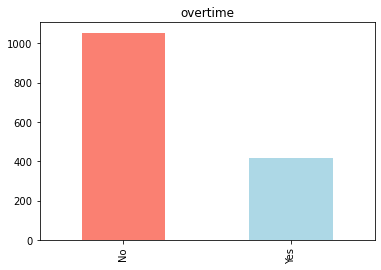

In [21]:
df['OverTime'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="overtime")

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

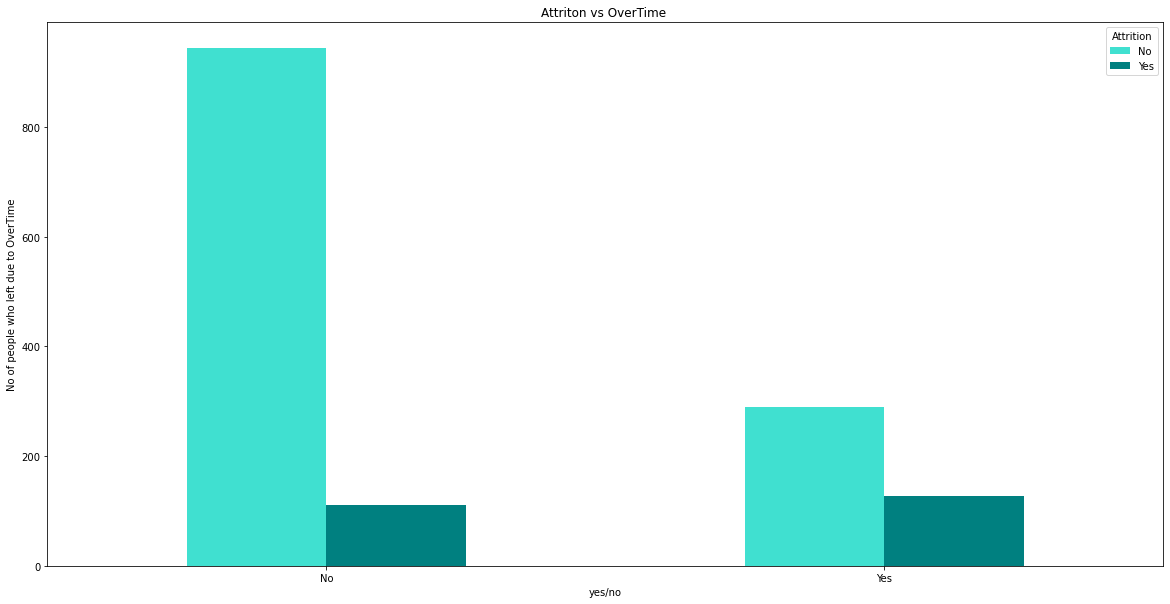

In [22]:
pd.crosstab(df['OverTime'],df['Attrition']).plot(kind="bar",color=['turquoise','teal'],figsize=(20,10))
plt.title("Attriton vs OverTime ")
plt.xlabel("yes/no")
plt.ylabel("No of people who left due to OverTime")
plt.xticks(rotation=0)

In [23]:
def Attrition(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
def OverTime(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

In [24]:
df['Attrition'] = df['Attrition'].apply(Attrition)
df['OverTime']= df['OverTime'].apply(OverTime)

In [ ]:
df.drop()

# Data Manipulation

We need to change categorial values to numerical values.
For this we will use pandas get_dummies() function

In [25]:
df['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [26]:
df_dummy1 = pd.get_dummies(df, columns= ['BusinessTravel'])
df_dummy1.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,...,8,0,1,6,4,0,5,0,0,1
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,...,10,3,3,10,7,1,7,0,1,0
2,37,1,1373,Research & Development,2,2,Other,1,4,4,...,7,3,3,0,0,0,0,0,0,1
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,...,8,3,3,8,7,3,0,0,1,0
4,27,0,591,Research & Development,2,1,Medical,1,7,1,...,6,3,3,2,2,2,2,0,0,1


In [27]:
df['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [28]:
df_dummy2 = pd.get_dummies(df_dummy1, columns= ['Department'])
df_dummy2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1102,1,2,Life Sciences,1,1,2,Female,...,6,4,0,5,0,0,1,0,0,1
1,49,0,279,8,1,Life Sciences,1,2,3,Male,...,10,7,1,7,0,1,0,0,1,0
2,37,1,1373,2,2,Other,1,4,4,Male,...,0,0,0,0,0,0,1,0,1,0
3,33,0,1392,3,4,Life Sciences,1,5,4,Female,...,8,7,3,0,0,1,0,0,1,0
4,27,0,591,2,1,Medical,1,7,1,Male,...,2,2,2,2,0,0,1,0,1,0


In [30]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [31]:
df_dummy3 = pd.get_dummies(df_dummy2, columns= ['Gender'])
df_dummy3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male
0,41,1,1102,1,2,Life Sciences,1,1,2,94,...,0,5,0,0,1,0,0,1,1,0
1,49,0,279,8,1,Life Sciences,1,2,3,61,...,1,7,0,1,0,0,1,0,0,1
2,37,1,1373,2,2,Other,1,4,4,92,...,0,0,0,0,1,0,1,0,0,1
3,33,0,1392,3,4,Life Sciences,1,5,4,56,...,3,0,0,1,0,0,1,0,1,0
4,27,0,591,2,1,Medical,1,7,1,40,...,2,2,0,0,1,0,1,0,0,1


In [32]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [33]:
df_dummy4 = pd.get_dummies(df_dummy3, columns= ['JobRole'])
df_dummy4.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,Life Sciences,1,1,2,94,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,Life Sciences,1,2,3,61,...,1,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,Other,1,4,4,92,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,Life Sciences,1,5,4,56,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,Medical,1,7,1,40,...,1,0,0,1,0,0,0,0,0,0


In [35]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [41]:
Data = pd.get_dummies(df_dummy4, columns= ['EducationField'])
Data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,1,0,0,0,0
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,0,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,0,0,1,0
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,0,0,0
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,0,0,1,0,0


In [83]:
Data.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
HourlyRate                           int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
BusinessTravel_Non-Travel            uint8
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Human Resources           uint8
Department_Research & Development    uint8
Department_

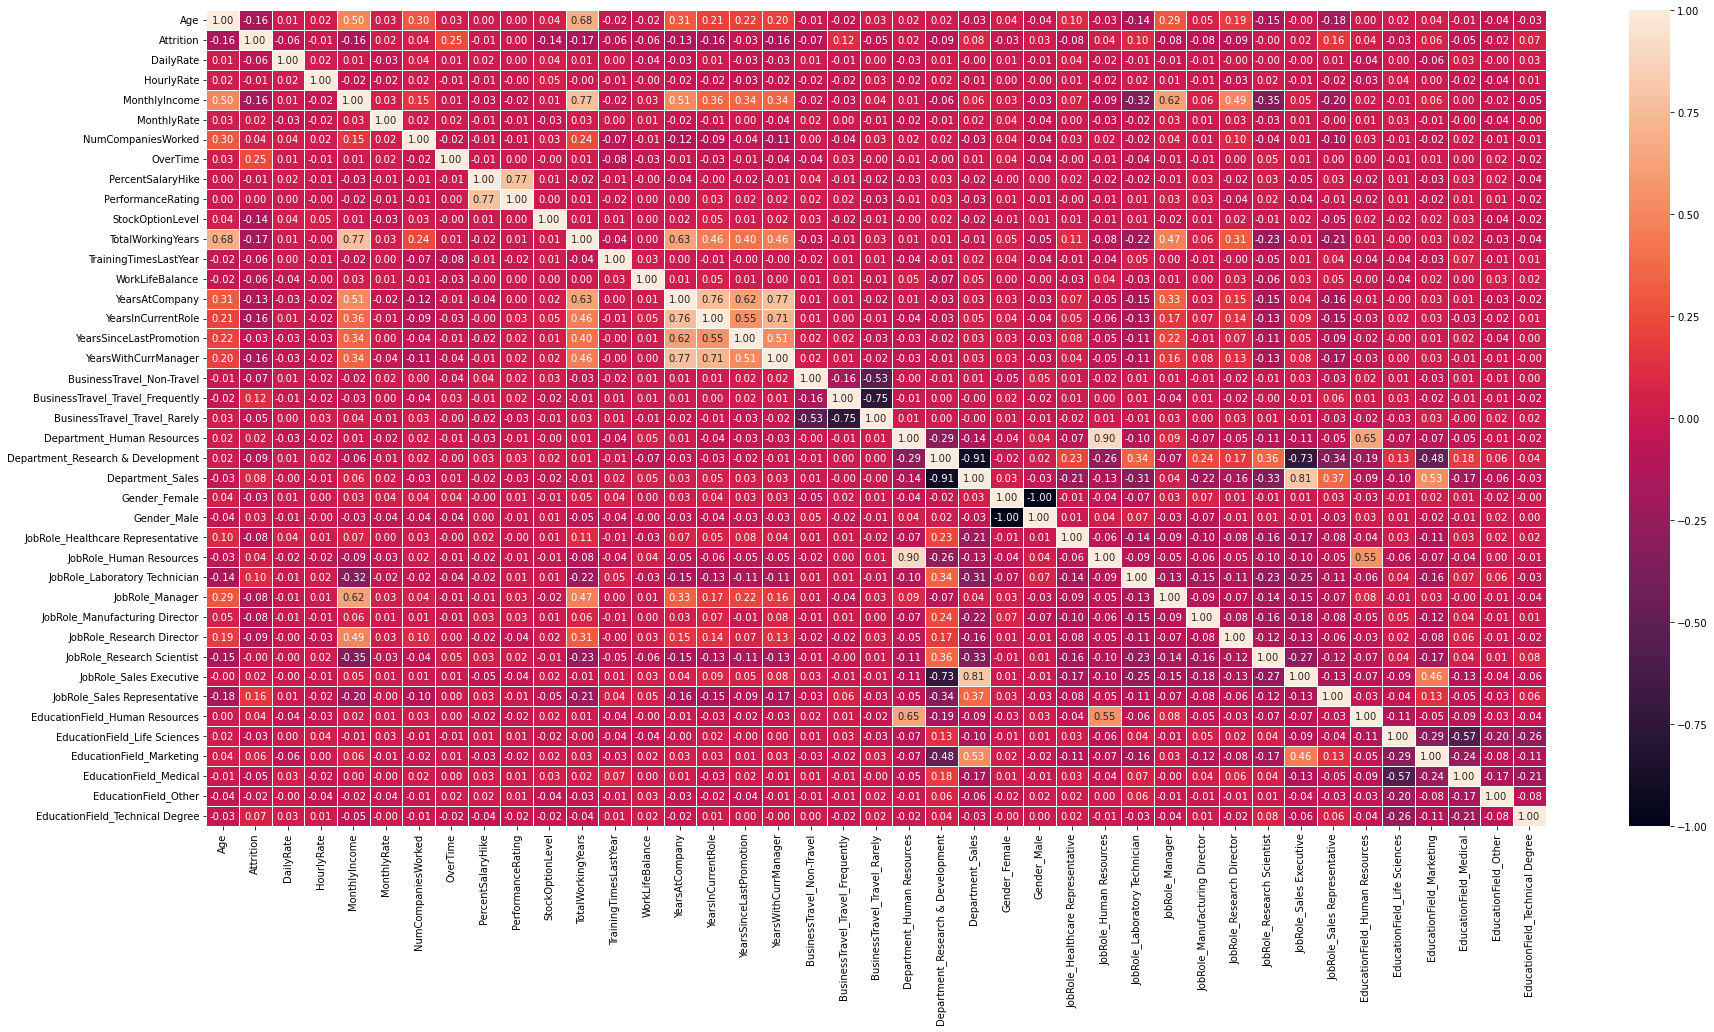

In [86]:
corr_matrix=Data.corr()
fig,ax=plt.subplots(figsize=(30,15))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [89]:
#Saving the cleaned dataset into another CSV file
Data.to_csv("processed table.csv")

**Now, from the processed data we have to separate the features and target column**

In [92]:
features =  list(Data.columns.difference(["Attrition"]))
X = Data[features]                          #Independent variable
y = Data[["Attrition"]]                     #Dependent variable

In [93]:
X.shape

(1470, 40)

# Splitting data – Train test split

In [95]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 100)
X_train.head()

,Age,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
754,33,1,0,0,1038,0,0,1,0,1,...,19,3,0,3,2,2,2,2,2,2
1212,34,0,0,1,678,0,1,0,0,1,...,12,3,0,10,3,3,10,9,8,7
1352,44,0,0,1,170,0,1,0,0,1,...,15,3,1,10,5,3,2,0,2,2
46,34,1,0,0,1065,0,0,1,0,0,...,20,4,0,10,2,3,9,5,8,7
953,44,0,0,1,935,0,1,0,0,1,...,12,3,0,10,4,4,3,2,1,2


# Model Development



In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()

In [98]:
for a,b in zip([lr,dt,rm],["Logistic Regression","Decision Tree","Random Forest"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

C:\Users\mohat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohat\AppData\Local\Temp\ipykernel_18820\4234051709.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  a.fit(X_train,y_train)


[Logistic Regression] training data accuracy is : 0.856624
[Logistic Regression] test data accuracy is : 0.853261
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.750000
[Random Forest] training data accuracy is : 0.999093
[Random Forest] test data accuracy is : 0.855978


**Model Scores (accuracy)**


In [99]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8532608695652174,
 'Random forest': 0.8559782608695652,
 'Decision tree': 0.75}

**Logistic regression and Random forest have the best accuracy.**

# Classification Report of Random forest

In [100]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.71      0.17      0.27        59

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.60       368
weighted avg       0.84      0.86      0.82       368



# Classification Report of Logistic Regression

In [101]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       309
           1       0.67      0.17      0.27        59

    accuracy                           0.85       368
   macro avg       0.76      0.58      0.59       368
weighted avg       0.83      0.85      0.81       368



In [102]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,Random forest,Decision tree
accuracy,0.853261,0.855978,0.75


<AxesSubplot:>

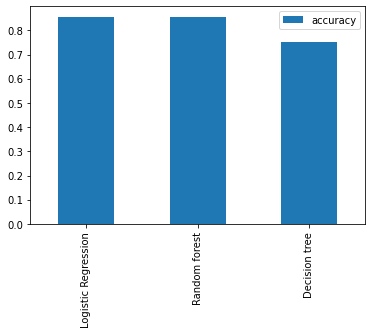

In [103]:
model_compare.T.plot(kind='bar')